# Исследование рейтинга фильмов по версии сайта IMDb

# Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_rows=100
pd.options.display.max_columns=250

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set()
sns.set_palette('husl')

from pylab import rcParams

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Данные с сайта kaggle.com 
# https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset

In [3]:
data = pd.read_csv('movie_metadata.csv')

In [4]:
data.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

      actor_1_name                                        movie_title  \
0      CCH Pounder                                            Avatar    
1      Johnny Depp          Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                           Spectre    
3        Tom Hardy                             The Dark Knight Rises    
4      Doug Walker  Star Wars: Episode VII - The Force Awakens    ...   

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0           886204                       4834             Wes Studi   
1           471220                      48350        Jack Davenport   
2           275868                      11700      Stephanie Sigman   
3          1144337                     106759  Joseph Gordon-Levitt   
4                8                        143                   NaN   

   facenumber_in_poster                                      plot_keywords  \
0                   0.0             avatar|future|marine|native|paraplegic   
1                   0.0  goddess|marriage ceremony|marriage proposal|pi...   
2                   1.0                bomb|espionage|sequel|spy|terrorist   
3                   0.0  deception|imprisonment|lawlessness|police offi...   
4                   0.0                                                NaN   

                                     movie_imdb_link  num_user_for_reviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...                3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...                1238.0   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...                 994.0   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...                2701.0   
4  http://www.imdb.com/title/tt5289954/?ref_=fn_t...                   NaN   

  language country content_rating       budget  title_year  \
0  English     USA          PG-13  237000000.0      2009.0   
1  English     USA          PG-13  300000000.0      2007.0   
2  English      UK          PG-13  245000000.0      2015.0   
3  English     USA          PG-13  250000000.0      2012.0   
4      NaN     NaN            NaN          NaN         NaN   

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
0                   936.0         7.9          1.78                 33000  
1                  5000.0         7.1          2.35                     0  
2                   393.0         6.8          2.35                 85000  
3                 23000.0         8.5          2.35                164000  
4                    12.0         7.1           NaN                     0

In [5]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [6]:
data.describe()

num_critic_for_reviews     duration  director_facebook_likes  \
count             4993.000000  5028.000000              4939.000000   
mean               140.194272   107.201074               686.509212   
std                121.601675    25.197441              2813.328607   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 7.000000   
50%                110.000000   103.000000                49.000000   
75%                195.000000   118.000000               194.500000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5020.000000             5036.000000  4.159000e+03   
mean               645.009761             6560.047061  4.846841e+07   
std               1665.041728            15020.759120  6.845299e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                133.000000              614.000000  5.340988e+06   
50%                371.500000              988.000000  2.551750e+07   
75%                636.000000            11000.000000  6.230944e+07   
max              23000.000000           640000.000000  7.605058e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count     5.043000e+03                5043.000000           5030.000000   
mean      8.366816e+04                9699.063851              1.371173   
std       1.384853e+05               18163.799124              2.013576   
min       5.000000e+00                   0.000000              0.000000   
25%       8.593500e+03                1411.000000              0.000000   
50%       3.435900e+04                3090.000000              1.000000   
75%       9.630900e+04               13756.500000              2.000000   
max       1.689764e+06              656730.000000             43.000000   

       num_user_for_reviews        budget   title_year  \
count           5022.000000  4.551000e+03  4935.000000   
mean             272.770808  3.975262e+07  2002.470517   
std              377.982886  2.061149e+08    12.474599   
min                1.000000  2.180000e+02  1916.000000   
25%               65.000000  6.000000e+06  1999.000000   
50%              156.000000  2.000000e+07  2005.000000   
75%              326.000000  4.500000e+07  2011.000000   
max             5060.000000  1.221550e+10  2016.000000   

       actor_2_facebook_likes   imdb_score  aspect_ratio  movie_facebook_likes  
count             5030.000000  5043.000000   4714.000000           5043.000000  
mean              1651.754473     6.442138      2.220403           7525.964505  
std               4042.438863     1.125116      1.385113          19320.445110  
min                  0.000000     1.600000      1.180000              0.000000  
25%                281.000000     5.800000      1.850000              0.000000  
50%                595.000000     6.600000      2.350000            166.000000  
75%                918.000000     7.200000      2.350000           3000.000000  
max             137000.000000     9.500000     16.000000         349000.000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

### Заполним пропущенные данные соответствующими медианными значениями

In [8]:
def fill_col(col):
    """
    Fill in empty spaces by the median value.  
    
    """
    col.fillna(col.median(), inplace=True)

In [9]:
fill_col(data.loc[:, 'num_critic_for_reviews'])
fill_col(data.loc[:, 'duration'])
fill_col(data.loc[:, 'director_facebook_likes'])
fill_col(data.loc[:, 'actor_3_facebook_likes'])
fill_col(data.loc[:, 'actor_1_facebook_likes'])
fill_col(data.loc[:, 'num_voted_users'])
fill_col(data.loc[:, 'gross'])
fill_col(data.loc[:, 'cast_total_facebook_likes'])
fill_col(data.loc[:, 'facenumber_in_poster'])
fill_col(data.loc[:, 'num_user_for_reviews'])
fill_col(data.loc[:, 'budget'])
fill_col(data.loc[:, 'actor_2_facebook_likes'])
fill_col(data.loc[:, 'title_year'])
fill_col(data.loc[:, 'imdb_score'])
fill_col(data.loc[:, 'aspect_ratio'])

In [10]:
title_dict = {'fontsize': 20, 'fontweight': 'bold', 'family': 'Calibri'}
label_dict = {'fontsize': '14', 'family': 'Calibri'}

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap=sns.color_palette("vlag"), annot=True)
plt.title('Матрица корреляции', fontdict=title_dict);

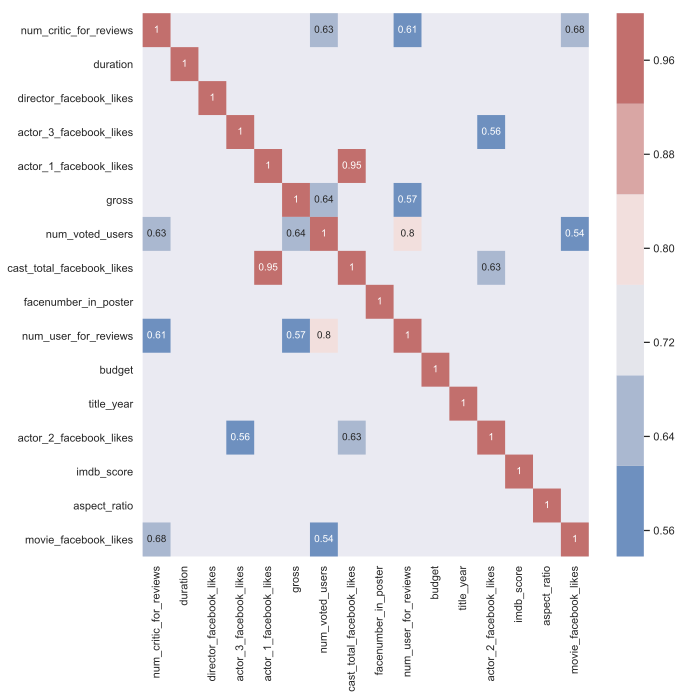

In [12]:
c = data.corr()
c = c[abs(c) > 0.5]
plt.figure(figsize=(10,10))
sns.heatmap(data=c, cmap=sns.color_palette("vlag"), annot=True);

Из матрицы корреляции видим, что рейтинг не имеет значительной связи ни с одним из признаков, как и бюджет фильмов. А кассовые сборы коррелируют с количеством проголосовавших и чуть меньше с количеством пользователей, оставивших отзывы. Это скорее всего объясняется тем, что кассовые сборы - это почти то же самое, что число зрителей. Самые большие показатели корреляции дают различные комбинации фейсбучных лайков между собой.


## Исследуем зависимости рейтинга и кассовых сборов фильмов от бюджета, страны и жанра. Для этого сначала создадим новый датафрейм, содержащий нужные нам признаки.

In [13]:
imdb = pd.DataFrame(data, columns=['movie_title', 'gross', 'budget', 'genres', 'country', 'imdb_score'])

In [14]:
imdb.head()

movie_title        gross  \
0                                            Avatar   760505847.0   
1          Pirates of the Caribbean: At World's End   309404152.0   
2                                           Spectre   200074175.0   
3                             The Dark Knight Rises   448130642.0   
4  Star Wars: Episode VII - The Force Awakens    ...   25517500.0   

        budget                           genres country  imdb_score  
0  237000000.0  Action|Adventure|Fantasy|Sci-Fi     USA         7.9  
1  300000000.0         Action|Adventure|Fantasy     USA         7.1  
2  245000000.0        Action|Adventure|Thriller      UK         6.8  
3  250000000.0                  Action|Thriller     USA         8.5  
4   20000000.0                      Documentary     NaN         7.1

### Построим гисторгамму рейтинга

In [15]:
score = imdb['imdb_score']
plt.figure(figsize=(10, 6))
sns.distplot(score, bins=40, kde=False, rug=True)
plt.title('Плотность распределения рейтинга', fontdict=title_dict);

Мы видим, что гистограмма не симметрична, количество фильмов с низким рейтингом превышает количество фильмов с высоким рейтингом

In [16]:
rcParams['figure.figsize'] = 12, 8

In [17]:
fig = pd.plotting.bootstrap_plot(score)

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(score, orient='v')
plt.title('Рейтинг', fontdict=title_dict);

Здесь мы тоже видим, что количество "выбросов" снизу, то есть с низким рейтингом, гораздо больше "выбросов" с высоким рейтингом.

### Рассмотрим разрезы по странам

In [19]:
countries = imdb.groupby('country')['imdb_score'].mean()

In [20]:
rcParams['figure.figsize'] = 10, 12

In [21]:
countries.sort_values().plot(kind='barh')

plt.title('Средний рейтинг по странам', fontdict=title_dict)
plt.xlabel('Средний рейтинг', fontdict=label_dict)
plt.ylabel('Страна', fontdict=label_dict);

Мы видим, что наибольший рейтинг имеют фильмы, произведенные в "некиноматографических" странах. Скрорее всего в американский прокат попадают только лучшие и/или фестивальные фильмы из других стран, которые являются скорее исключениями.

In [22]:
country_total = imdb['country'].value_counts()
country_total.head(20)

USA             3807
UK               448
France           154
Canada           126
Germany           97
Australia         55
India             34
Spain             33
China             30
Italy             23
Japan             23
Mexico            17
Hong Kong         17
New Zealand       15
South Korea       14
Ireland           12
Denmark           11
Russia            11
Brazil             8
South Africa       8
Name: country, dtype: int64

In [23]:
country_total.sort_values().plot(kind='barh', log=True)

plt.title('Количество фильмов по странам', fontdict=title_dict)
plt.xlabel('Количество фильмов', fontdict=label_dict)
plt.ylabel('Страна', fontdict=label_dict);

На графике представлено количество фильмов по странам в логарифмическом масштабе, так как у большинства стран оно не больше десяти. Что не сравнимо с США.

### Рассмотрим страны с наибольшим количеством фильмов 

In [24]:
country_total.nlargest(5)

USA        3807
UK          448
France      154
Canada      126
Germany      97
Name: country, dtype: int64

In [25]:
rcParams['figure.figsize'] = 10, 6

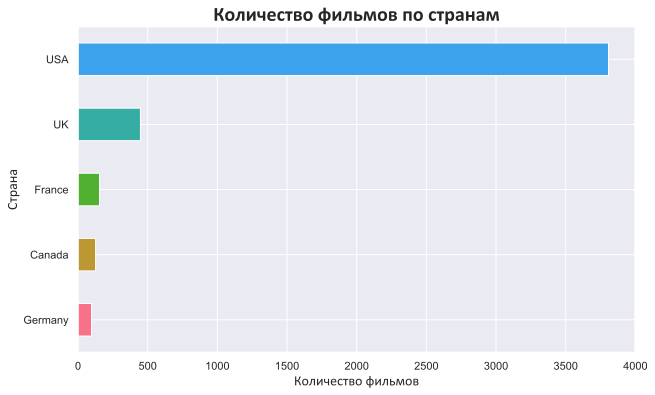

In [26]:
country_total.nlargest(5).sort_values().plot(kind='barh')

plt.title('Количество фильмов по странам', fontdict=title_dict)
plt.xlabel('Количество фильмов', fontdict=label_dict)
plt.ylabel('Страна', fontdict=label_dict)

plt.show()

In [27]:
ds = imdb.loc[imdb['country'].isin(['USA', 'UK', 'France', 'Canada', 'Germany']), :]
ds.head()

movie_title        gross       budget  \
0                                    Avatar   760505847.0  237000000.0   
1  Pirates of the Caribbean: At World's End   309404152.0  300000000.0   
2                                   Spectre   200074175.0  245000000.0   
3                     The Dark Knight Rises   448130642.0  250000000.0   
5                               John Carter    73058679.0  263700000.0   

                            genres country  imdb_score  
0  Action|Adventure|Fantasy|Sci-Fi     USA         7.9  
1         Action|Adventure|Fantasy     USA         7.1  
2        Action|Adventure|Thriller      UK         6.8  
3                  Action|Thriller     USA         8.5  
5          Action|Adventure|Sci-Fi     USA         6.6

### Посмотрим, как отличаются параметры рейтинга, бюджета и сборов по странам

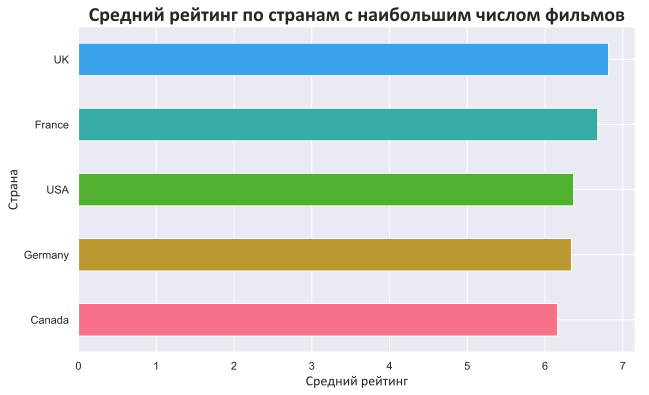

In [28]:
top_5 = ds.groupby('country')['imdb_score'].mean()
top_5.sort_values().plot(kind='barh')

plt.title('Средний рейтинг по странам с наибольшим числом фильмов', fontdict=title_dict)
plt.xlabel('Средний рейтинг', fontdict=label_dict)
plt.ylabel('Страна', fontdict=label_dict)

plt.show()

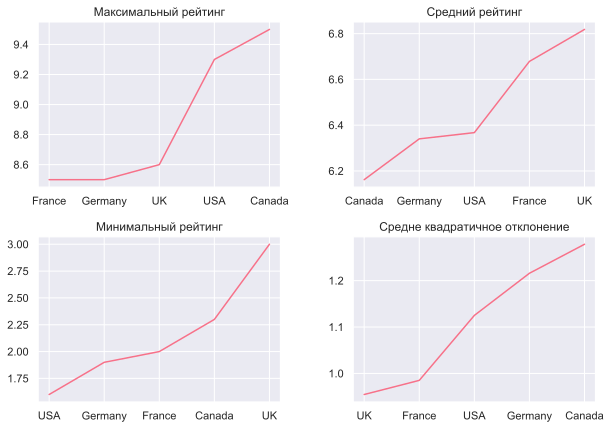

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.plot(ds.groupby('country')['imdb_score'].max().sort_values())
ax1.set_title('Максимальный рейтинг')

ax2.plot(ds.groupby('country')['imdb_score'].mean().sort_values())
ax2.set_title('Средний рейтинг')

ax3.plot(ds.groupby('country')['imdb_score'].min().sort_values())
ax3.set_title('Минимальный рейтинг')

ax4.plot(ds.groupby('country')['imdb_score'].std().sort_values())
ax4.set_title('Средне квадратичное отклонение')

fig.set_size_inches(10, 7)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

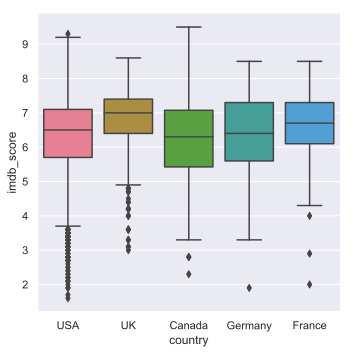

In [30]:
sns.catplot(x='country', y='imdb_score', kind="box", data=ds);

Поскольку фильмов из США подавляющее количество, мы видим, что распределение рейтинга фильмов из США очень близко распределению рейтинга всего датасета.

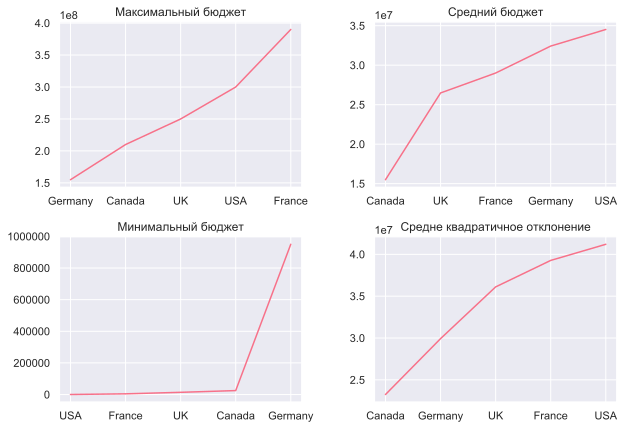

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.plot(ds.groupby('country')['budget'].max().sort_values())
ax1.set_title('Максимальный бюджет')

ax2.plot(ds.groupby('country')['budget'].mean().sort_values())
ax2.set_title('Средний бюджет')

ax3.plot(ds.groupby('country')['budget'].min().sort_values())
ax3.set_title('Минимальный бюджет')

ax4.plot(ds.groupby('country')['budget'].std().sort_values())
ax4.set_title('Средне квадратичное отклонение')

fig.set_size_inches(10, 7)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

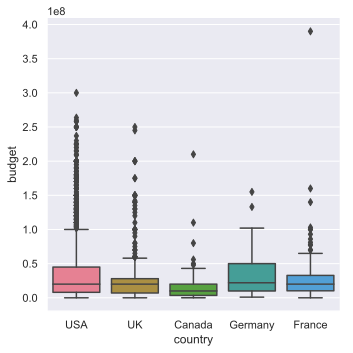

In [32]:
sns.catplot(x='country', y='budget', kind="box", data=ds);

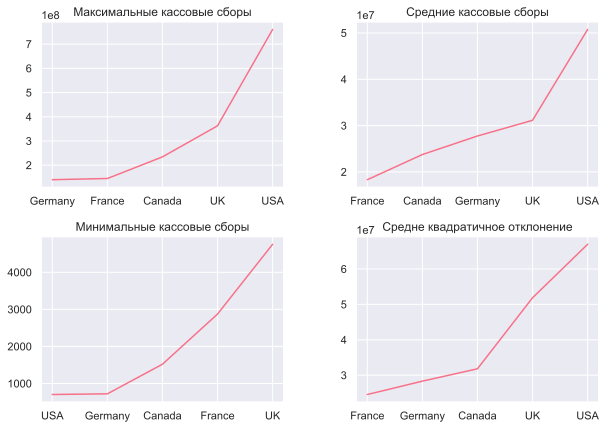

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.plot(ds.groupby('country')['gross'].max().sort_values())
ax1.set_title('Максимальные кассовые сборы')

ax2.plot(ds.groupby('country')['gross'].mean().sort_values())
ax2.set_title('Средние кассовые сборы')

ax3.plot(ds.groupby('country')['gross'].min().sort_values())
ax3.set_title('Минимальные кассовые сборы')

ax4.plot(ds.groupby('country')['gross'].std().sort_values())
ax4.set_title('Средне квадратичное отклонение')

fig.set_size_inches(10, 7)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

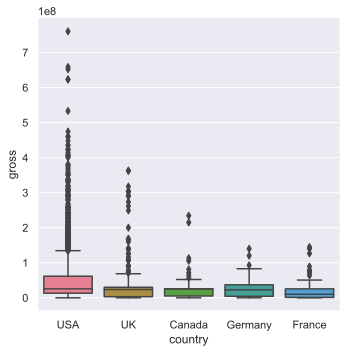

In [34]:
sns.catplot(x='country', y='gross', kind="box", data=ds);

In [35]:
ds.corr()

gross    budget  imdb_score
gross       1.000000  0.652707    0.194109
budget      0.652707  1.000000    0.052124
imdb_score  0.194109  0.052124    1.000000

### Кассовые сборы и бюджет коррелируют в этой выборке, можно применить линейную регрессию

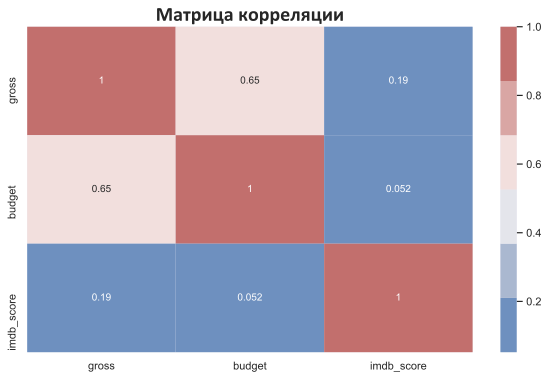

In [36]:
sns.heatmap(data=ds.corr(), cmap=sns.color_palette("vlag"), annot=True)
plt.title('Матрица корреляции', fontdict=title_dict);

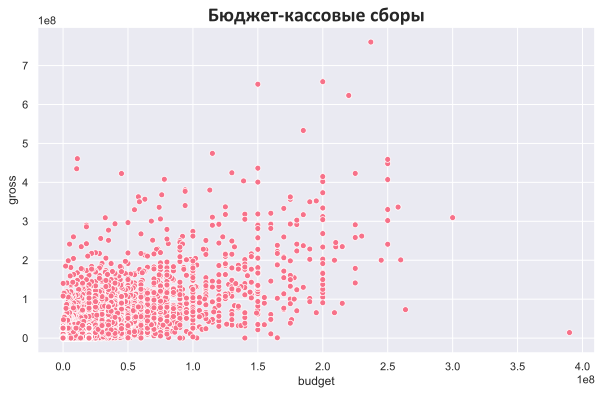

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ds['budget'], y=ds['gross'])
plt.title('Бюджет-кассовые сборы', fontdict=title_dict);

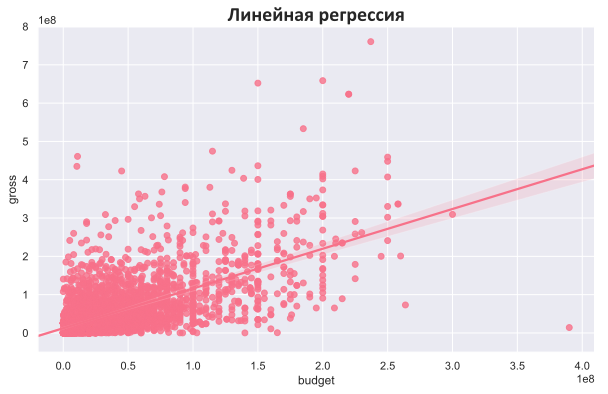

In [38]:
plt.figure(figsize=(10, 6))
sns.regplot(x=ds['budget'], y=ds['gross'])
plt.title('Линейная регрессия', fontdict=title_dict);

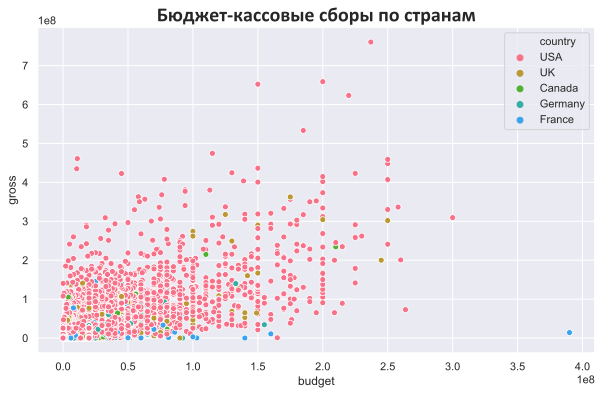

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ds['budget'], y=ds['gross'], hue=ds['country'])
plt.title('Бюджет-кассовые сборы по странам', fontdict=title_dict);

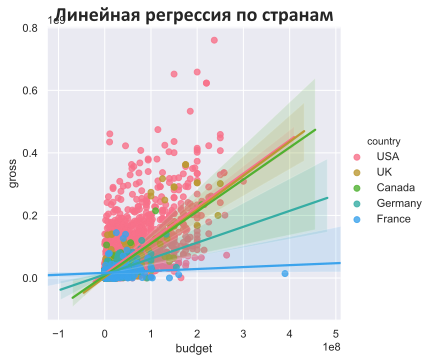

In [40]:
sns.lmplot(x='budget', y='gross', hue='country', data=ds)
plt.title('Линейная регрессия по странам', fontdict=title_dict);

### Теперь рассмотрим выборку в разрезе жанров

In [41]:
ds['genres'].nunique()

857

Жанров слишком много, сгруппируем фильмы по жанрам и посмотрим на их количество

In [42]:
ds['genres'].value_counts().head(30)

Comedy                                       204
Drama                                        203
Comedy|Drama|Romance                         179
Comedy|Drama                                 176
Comedy|Romance                               151
Drama|Romance                                137
Crime|Drama|Thriller                          95
Horror                                        63
Action|Crime|Thriller                         61
Action|Crime|Drama|Thriller                   61
Drama|Thriller                                56
Crime|Drama                                   55
Horror|Thriller                               54
Crime|Drama|Mystery|Thriller                  51
Action|Adventure|Sci-Fi                       50
Comedy|Crime                                  50
Documentary                                   46
Action|Adventure|Thriller                     45
Horror|Mystery|Thriller                       35
Biography|Drama                               35
Drama|Mystery|Thrill

### Сгруппируем жанры по первым словам, чтобы сократить количество вариантов

In [43]:
#ds['genres'].sort_values().unique()

In [44]:
ds = ds.replace({'genres': r'^Action.*'}, {'genres': 'Action'}, regex=True)
ds = ds.replace({'genres': r'^Adventure.*'}, {'genres': 'Adventure'}, regex=True)
ds = ds.replace({'genres': r'^Animation.*'}, {'genres': 'Animation'}, regex=True)
ds = ds.replace({'genres': r'^Biography.*'}, {'genres': 'Biography'}, regex=True)
ds = ds.replace({'genres': r'^Comedy.*'}, {'genres': 'Comedy'}, regex=True)
ds = ds.replace({'genres': r'^Crime.*'}, {'genres': 'Crime'}, regex=True)
ds = ds.replace({'genres': r'^Drama.*'}, {'genres': 'Drama'}, regex=True)
ds = ds.replace({'genres': r'^Horror.*'}, {'genres': 'Horror'}, regex=True)
ds = ds.replace({'genres': r'^Documentary.*'}, {'genres': 'Documentary'}, regex=True)
ds = ds.replace({'genres': r'^Family.*'}, {'genres': 'Family'}, regex=True)
ds = ds.replace({'genres': r'^Fantasy.*'}, {'genres': 'Fantasy'}, regex=True)
ds = ds.replace({'genres': r'^Mystery.*'}, {'genres': 'Mystery'}, regex=True)
ds = ds.replace({'genres': r'^Sci-Fi.*'}, {'genres': 'Sci-Fi'}, regex=True)
ds = ds.replace({'genres': r'^Film-Noir.*'}, {'genres': 'Mystery'}, regex=True)
ds = ds.replace({'genres': r'^Romance.*'}, {'genres': 'Romance'}, regex=True)
ds = ds.replace({'genres': r'^Game-Show.*'}, {'genres': 'Romance'}, regex=True)
ds = ds.replace({'genres': r'^Thriller.*'}, {'genres': 'Thriller'}, regex=True)
ds = ds.replace({'genres': r'^Musical.*'}, {'genres': 'Musical'}, regex=True)

In [45]:
ds['genres'].value_counts()

Comedy         1268
Action         1035
Drama           867
Adventure       410
Crime           324
Biography       232
Horror          218
Documentary      75
Animation        56
Fantasy          50
Mystery          31
Thriller         20
Sci-Fi           13
Family           11
Western          10
Romance           6
Musical           4
History           1
Music             1
Name: genres, dtype: int64

In [46]:
genres = ds.groupby('genres')['imdb_score'].mean().sort_values(ascending=False)
genres

genres
History        7.500000
Music          7.200000
Biography      7.168966
Documentary    7.125333
Crime          6.878395
Drama          6.735755
Animation      6.680357
Mystery        6.632258
Adventure      6.518293
Fantasy        6.406000
Action         6.206763
Comedy         6.177445
Western        6.150000
Musical        6.000000
Sci-Fi         6.000000
Family         5.709091
Horror         5.659174
Thriller       5.595000
Romance        5.516667
Name: imdb_score, dtype: float64

In [47]:
rcParams['figure.figsize'] = 8, 8

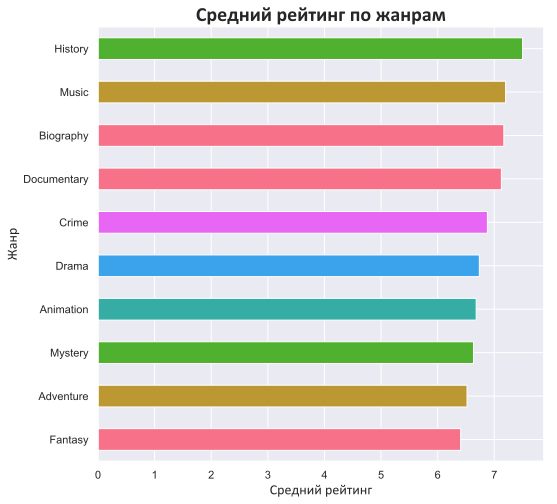

In [48]:
genres.nlargest(10).sort_values().plot(kind='barh')

plt.title('Средний рейтинг по жанрам', fontdict=title_dict)
plt.xlabel('Средний рейтинг', fontdict=label_dict)
plt.ylabel('Жанр', fontdict=label_dict)

plt.show()

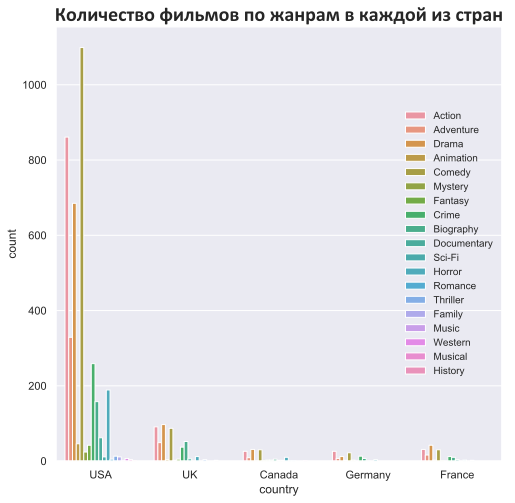

In [49]:
sns.countplot(x='country', hue='genres', data=ds)
plt.title('Количество фильмов по жанрам в каждой из стран', fontdict=title_dict)
plt.legend(loc='right', fontsize=10, frameon=False);

Лидерами рынка по количеству фильмов являются комедии, но в основном за счет США. В Великобритании, Канаде и Франции большее количество приходится на драму.

### Сводная таблица по кассовым сборам фильмов основных жанров по странам

In [50]:
pivot_table = ds.pivot_table('gross', index='genres', 
                                      columns='country', fill_value=0, aggfunc=np.sum)
pivot_table

country          Canada      France    Germany          UK          USA
genres                                                                 
Action       1101241934  1209359048  708621506  4202474305  68568942754
Adventure     362193835   254005657  402893748  3835837935  29192764683
Animation      25517500    11517100   98119213   186147762   3809740300
Biography      78471020    60743908   82490012  1138111585   6894417108
Comedy        443721619   363168092  696230922  1443801597  41402163654
Crime          27400081    70775086  326636068   733499537   8830579719
Documentary    25542284   133099101      84689    81905003    944727959
Drama         473223197   646284055  208293713  1759503350  22376078450
Family                0           0          0           0    651621433
Fantasy       123792202           0          0   116634027   1598291624
History               0           0          0           0     25517500
Horror        229334780     4989108  117091293   297312147   6573511885
Music                 0           0          0           0      3419967
Musical               0           0          0           0    210217306
Mystery          489220    15523168   51799570    51035000   1259174451
Romance        25517500           0          0           0    139082197
Sci-Fi         25573629           0          0           0    310588596
Thriller       25517500    51035000          0    79660716    255193531
Western        25517500           0          0    25746594    169231268

### Сводная таблица по рейтингу фильмов разных жанров по странам

In [51]:
pivot_table = ds.pivot_table('imdb_score', index='genres', 
                                      fill_value=0, columns='country')
pivot_table

country        Canada    France   Germany        UK       USA
genres                                                       
Action       5.465385  6.477419  5.823077  6.513187  6.198606
Adventure    5.755556  6.187500  6.328571  6.783673  6.519757
Animation    7.400000  7.900000  5.250000  7.000000  6.619565
Biography    7.220000  7.160000  7.428571  7.253846  7.128481
Comedy       6.510000  6.776667  5.790909  6.687356  6.119381
Crime        6.800000  6.800000  7.346154  6.832432  6.866023
Documentary  7.550000  7.700000  7.500000  7.466667  7.035484
Drama        6.419355  6.600000  7.175000  7.072165  6.703066
Family       0.000000  0.000000  0.000000  0.000000  5.709091
Fantasy      6.333333  0.000000  0.000000  7.100000  6.328571
History      0.000000  0.000000  0.000000  0.000000  7.500000
Horror       5.760000  6.633333  5.875000  5.966667  5.614286
Music        0.000000  0.000000  0.000000  0.000000  7.200000
Musical      0.000000  0.000000  0.000000  0.000000  6.000000
Mystery      7.300000  7.200000  5.600000  6.500000  6.720833
Romance      6.600000  0.000000  0.000000  0.000000  5.300000
Sci-Fi       4.450000  0.000000  0.000000  0.000000  6.281818
Thriller     4.500000  6.700000  0.000000  6.600000  5.200000
Western      5.300000  0.000000  0.000000  6.200000  6.257143

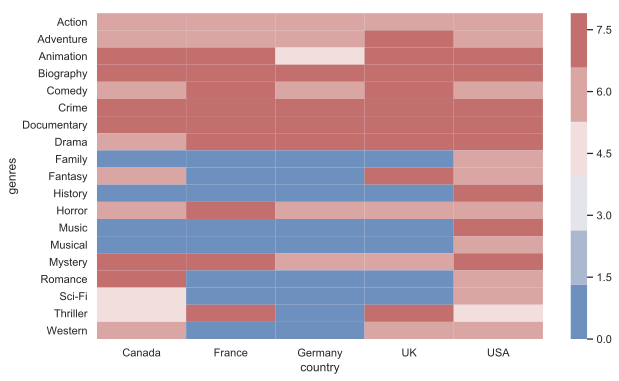

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(data=pivot_table,
            cmap=sns.color_palette("vlag"), ax=ax);

## Наконец, посмотрим, какие рейтинги имеют фильмы из России и СССР

In [53]:
Russian_films = imdb.loc[imdb['country'].isin(['Russia', 'Soviet Union']), :]
Russian_films

movie_title       gross      budget  \
1061                              Solaris   25517500.0   1000000.0   
1382                     Obitaemyy ostrov   25517500.0  29500000.0   
1731                     A Warrior's Tail   25517500.0  30000000.0   
1878                                  Viy   25517500.0  26000000.0   
2010                           Space Dogs   25517500.0  25000000.0   
2305                        Machete Kills    7268659.0  20000000.0   
2451     Mongol: The Rise of Genghis Khan    5701643.0  20000000.0   
2739                           The Return     502028.0  20000000.0   
3532                     Hard to Be a God   25517500.0   7000000.0   
3538                           Snow Queen   25517500.0   7000000.0   
3883                          Night Watch    1487477.0   4200000.0   
3957  The Geographer Drank His Globe Away   25517500.0   4000000.0   

                                     genres       country  imdb_score  
1061                   Drama|Mystery|Sci-Fi  Soviet Union         8.1  
1382                Action|Adventure|Sci-Fi        Russia         5.3  
1731            Adventure|Animation|Fantasy        Russia         4.1  
1878     Adventure|Fantasy|Mystery|Thriller        Russia         5.4  
2010      Adventure|Animation|Comedy|Family        Russia         5.2  
2305           Action|Comedy|Crime|Thriller        Russia         5.6  
2451  Adventure|Biography|Drama|History|War        Russia         7.3  
2739                 Drama|Mystery|Thriller        Russia         8.0  
3532                           Drama|Sci-Fi        Russia         6.7  
3538             Adventure|Animation|Family        Russia         5.3  
3883                       Fantasy|Thriller        Russia         6.5  
3957                        Adventure|Drama        Russia         7.5

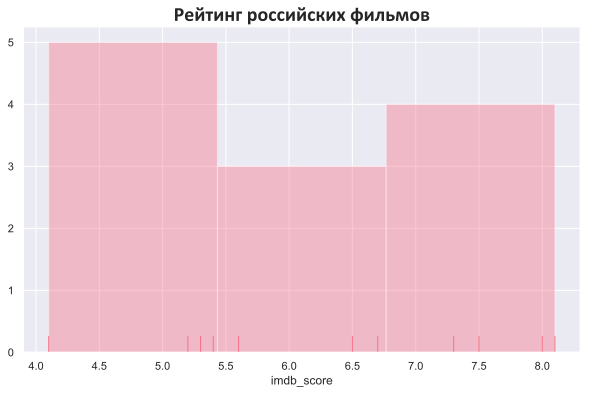

In [54]:
score = Russian_films['imdb_score']
plt.figure(figsize=(10, 6))
sns.distplot(score, kde=False, rug=True)
plt.title('Рейтинг российских фильмов', fontdict=title_dict);